# praktikum minggu ke 1

## praktik 1 memahami ukuran dalam gambar

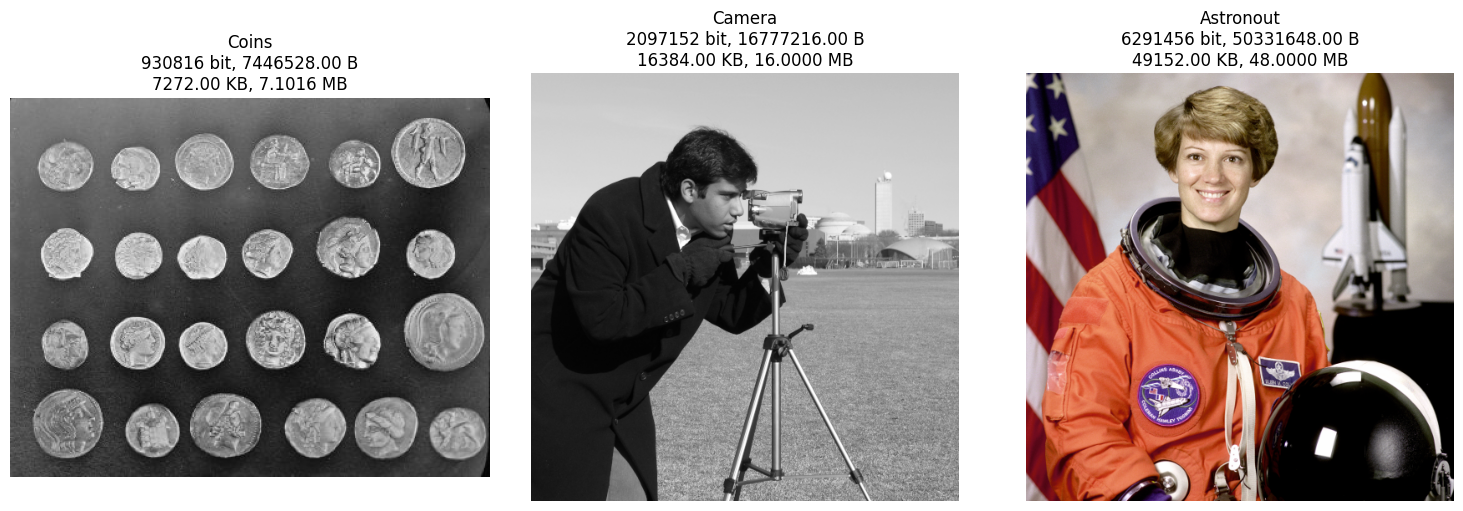

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

#mengambil gambar dari scikit image
coins_img = data.coins()
camera_img = data.camera()
astronout_img = data.astronaut()

#membuat fungsi hitung ukuran
def hitung_ukuran(image):
    bit_per_pixel = 8 if len(image.shape) == 2 else 24 #8 bit unuk grayscale, 25 untuk rgb
    total_pixel = image.shape[0] * image.shape[1]
    total_bit = total_pixel * bit_per_pixel
    total_byte = total_bit * 8
    total_kb = total_byte / 1024
    total_mb = total_kb / 1024
    return total_bit, total_byte, total_kb, total_mb

#menyusun gambar dan size dalam satu baris
fig, axes = plt.subplots(1, 3, figsize=(15,5))

#list gambar dan nama yang akan diolah
gambar_list = [coins_img, camera_img, astronout_img]
nama_list = ["Coins", "Camera", "Astronout"]

for ax, img, nama in zip(axes, gambar_list, nama_list):
    bits, bytes_, kb, mb = hitung_ukuran(img)
    ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    ax.set_title(f"{nama}\n{bits} bit, {bytes_:.2f} B\n{kb:.2f} KB, {mb:.4f} MB")
    ax.axis('off')

plt.tight_layout()
plt.show()

## praktik 2 memahami gambar yang terdiri dari beberapa pixel (mengambil salah satu pixel dari satu gambar)

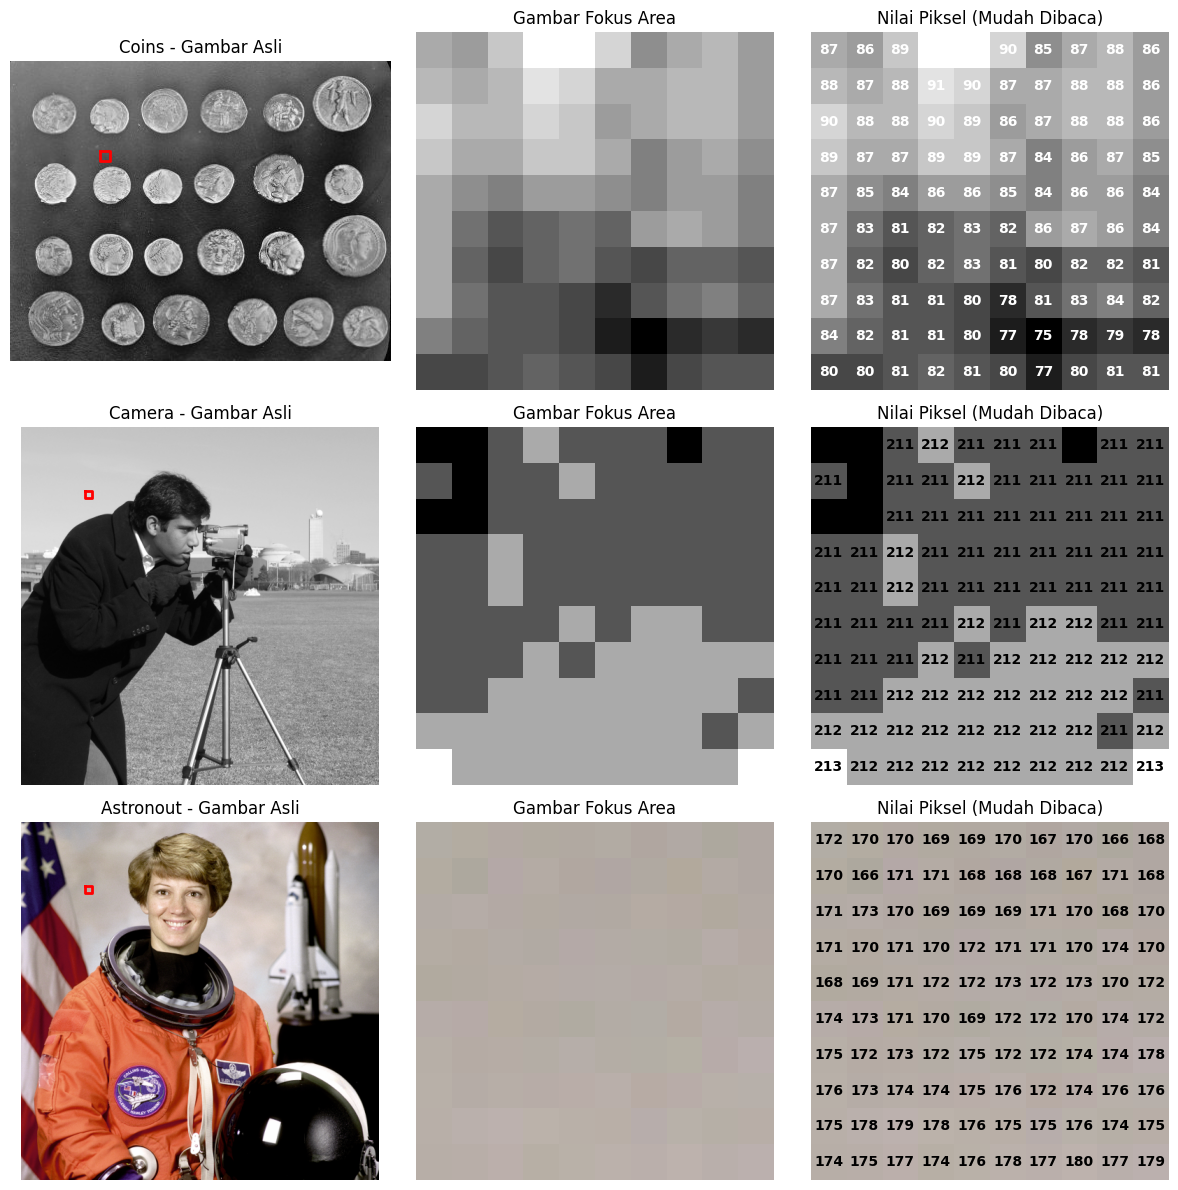

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

#koordinat gambar yang akan diambil
x_start, x_end = 90, 100
y_start, y_end = 90, 100

for i, (img, nama) in enumerate(zip(gambar_list, nama_list)):
    # Menampilkan gambar asli
    axes[i, 0].imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    axes[i, 0].set_title(f"{nama} - Gambar Asli")
    axes[i, 0].axis('off')

    # Menambahkan kotak merah untuk menunjukkan area yang difokuskan
    rect_x = [x_start, x_end, x_end, x_start, x_start]
    rect_y = [y_start, y_start, y_end, y_end, y_start]
    axes[i, 0].plot(rect_x, rect_y, color="red", linewidth=2)

    # Menampilkan gambar fokus area
    zoomed_img = img[y_start:y_end, x_start:x_end]
    axes[i, 1].imshow(zoomed_img, cmap='gray' if len(img.shape) == 2 else None, interpolation='nearest')
    axes[i, 1].set_title("Gambar Fokus Area")
    axes[i, 1].axis('off')

    # Menampilkan nilai piksel dalam area yang di-zoom
    axes[i, 2].imshow(zoomed_img, cmap='gray' if len(img.shape) == 2 else None, interpolation='nearest')

    for y in range(zoomed_img.shape[0]):
        for x in range(zoomed_img.shape[1]):
            if len(img.shape) == 3:  # Jika gambar RGB, gunakan rata-rata nilai kanal
                pixel_value = np.mean(zoomed_img[y, x]).astype(int)
            else:
                pixel_value = zoomed_img[y, x]

            # Pilih warna teks agar mudah dibaca pada gambar
            text_color = "white" if pixel_value < 128 else "black"
            axes[i, 2].text(x, y, str(pixel_value), color=text_color, ha='center', va='center', fontsize=10, fontweight='bold')

    axes[i, 2].set_title("Nilai Piksel (Mudah Dibaca)")
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()


## praktik 3 memahami gambar yang yang disimpan dalam array untuk mempermudah mnipulasi dan pemrosesan


 === Coins ===
Tipe data: <class 'numpy.ndarray'>
Dimensi: (303, 384)
Tipe nilai pixel: uint8
Contoh nilai dengan pixel 5x5 pertama: 
[[ 47 123 133 129 137]
 [ 93 144 145 143 145]
 [126 147 143 147 145]
 [131 136 133 139 136]
 [131 133 134 135 129]]

 === Camera ===
Tipe data: <class 'numpy.ndarray'>
Dimensi: (512, 512)
Tipe nilai pixel: uint8
Contoh nilai dengan pixel 5x5 pertama: 
[[200 200 200 200 199]
 [200 199 199 200 199]
 [199 199 199 200 200]
 [200 200 199 199 199]
 [200 200 200 200 199]]

 === Astronout ===
Tipe data: <class 'numpy.ndarray'>
Dimensi: (512, 512, 3)
Tipe nilai pixel: uint8
Contoh nilai dengan pixel 5x5 pertama: 
[[[154 147 151]
  [109 103 124]
  [ 63  58 102]
  [ 54  51  98]
  [ 76  76 106]]

 [[177 171 171]
  [144 141 143]
  [113 114 124]
  [106 107 120]
  [128 128 131]]

 [[201 194 193]
  [182 178 175]
  [168 165 164]
  [159 157 157]
  [167 165 161]]

 [[220 213 210]
  [214 206 206]
  [202 198 196]
  [197 191 193]
  [200 194 196]]

 [[232 223 223]
  [226 220 

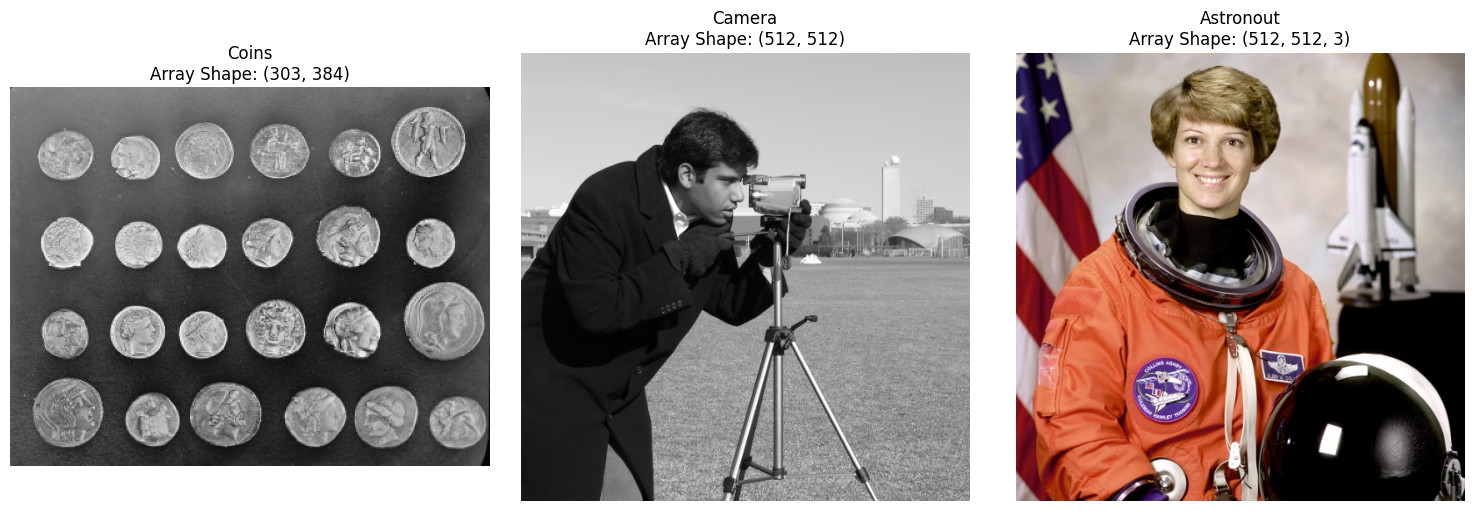

In [6]:
def info_array(image, nama):
    print(f"\n === {nama} ===")
    print(f"Tipe data: {type(image)}") #akan menampikan tipe 'numpy.ndarray'
    print(f"Dimensi: {image.shape}") #akan menampikan dimensi gambar (n,n,n(jika rgb))
    print(f"Tipe nilai pixel: {image.dtype}") #akan menampikan tipe data
    print("Contoh nilai dengan pixel 5x5 pertama: ") 
    print(image[:5, :5] if len(image.shape) == 2 else image[:5, :5, :]) #akan menampilkan jumlah pixel sesuai gambar grayscale atau rgb
    
info_array(coins_img, nama_list[0]) 
info_array(camera_img, nama_list[1]) 
info_array(astronout_img, nama_list[2]) 

#visualisasi
fig, axes = plt.subplots(1, 3, figsize=(15,5))    

for ax, img, nama in zip(axes, gambar_list, nama_list):
    ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    ax.set_title(f"{nama}\nArray Shape: {img.shape}")
    ax.axis('off')

plt.tight_layout()
plt.show()


## praktik 4 memahami koordinat gambar pada scimage

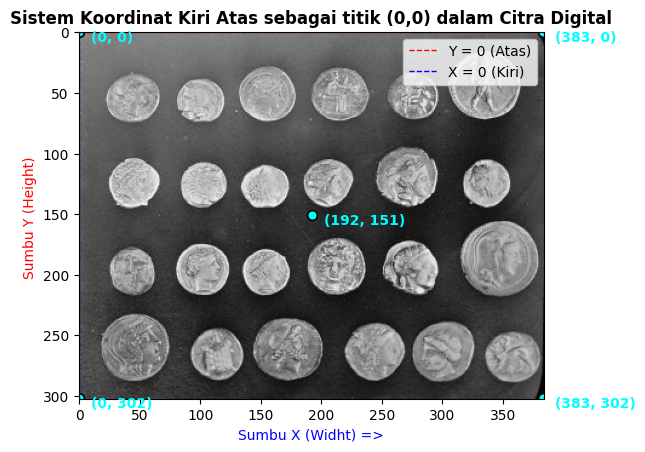

In [7]:
#mengambil ukuran gambar
height, width = coins_img.shape

#membuat plot
fig, axes = plt.subplots(figsize=(6,6))

#tampilkan gambar
axes.imshow(coins_img, cmap='gray')

#anotasi sumbu koordinat
axes.set_title("Sistem Koordinat Kiri Atas sebagai titik (0,0) dalam Citra Digital", fontsize=12, fontweight="bold")
axes.set_xlabel("Sumbu X (Widht) =>", fontsize=10, color="blue")
axes.set_ylabel("Sumbu Y (Height) ", fontsize=10, color="red")

#gambar koordinat utama
axes.axhline(y=0, color='red', linestyle='--', linewidth=1, label="Y = 0 (Atas)")
axes.axvline(x=0, color='blue', linestyle='--', linewidth=1, label="X = 0 (Kiri)")

#titik penting dengan warna yang kontras dari gambar
koordinat_titik = [(0,0), (width-1,0), (0,height-1), (width-1,height-1), (width//2, height//2)]

# Menampilkan titik koordinat pada gambar
for x, y in koordinat_titik:
    axes.scatter(x, y, color='cyan', s=50, edgecolors='black', linewidth=1.2)  # Titik dengan outline hitam
    axes.text(x + 10, y + 10, f"({x}, {y})", color="cyan", fontsize=10, fontweight="bold",ha="left", va="bottom")  

# Tambahkan legenda di pojok kanan atas
axes.legend(loc="upper right")


plt.show()


## praktik 5 memahami pengolahan warna RGB

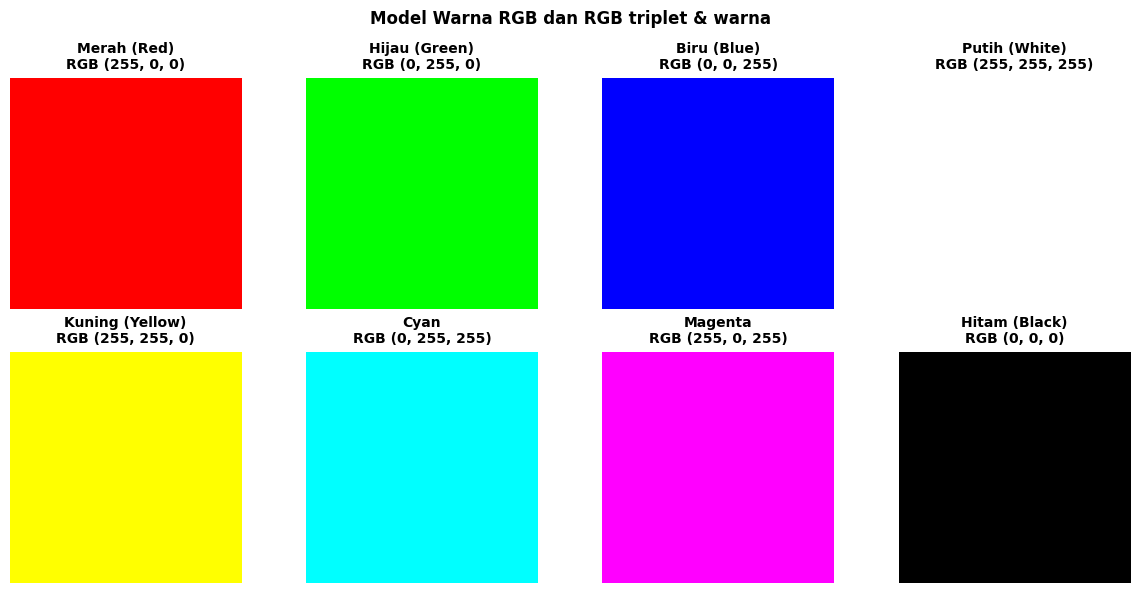

In [8]:
#3 chanel warna utama
red_chanel = np.zeros((100,100,3), dtype=np.uint8)
green_chanel = np.zeros((100,100,3), dtype=np.uint8)
blue_chanel = np.zeros((100,100,3), dtype=np.uint8)

#mengatur warna utama
red_chanel[:, :, 0] = 255 #red => (255, 0, 0)
green_chanel[:, :, 1] = 255 #red => (0, 255, 0)
blue_chanel[:, :, 2] = 255 #red => (0, 0, 255)

#membuat kombinasi warna
yellow = red_chanel + green_chanel
cyan = green_chanel + blue_chanel
magenta = red_chanel + blue_chanel
white = red_chanel + green_chanel + blue_chanel
black = np.zeros((100,100,3), dtype=np.uint8)

#menampilkan hasil
fig, axes = plt.subplots(2, 4, figsize=(12,6))

color_list = [red_chanel, green_chanel, blue_chanel, white, yellow, cyan, magenta, black]
color_names = ["Merah (Red)", "Hijau (Green)", "Biru (Blue)", "Putih (White)", "Kuning (Yellow)", "Cyan", "Magenta", "Hitam (Black)"]
rgb_values = ["(255, 0, 0)", "(0, 255, 0)", "(0, 0, 255)", "(255, 255, 255)", "(255, 255, 0)", "(0, 255, 255)", "(255, 0, 255)", "(0, 0, 0)"]

#memasukan gambar dalam plot
for ax, color, name, rgb in zip(axes.flat, color_list, color_names, rgb_values):
    ax.imshow(color)
    ax.set_title(f"{name}\nRGB {rgb}", fontsize=10, fontweight="bold")
    ax.axis('off')
    
plt.suptitle("Model Warna RGB dan RGB triplet & warna", fontsize=12, fontweight="bold")
plt.tight_layout()
plt.show()


## praktik 6 memahami layering 3 warna

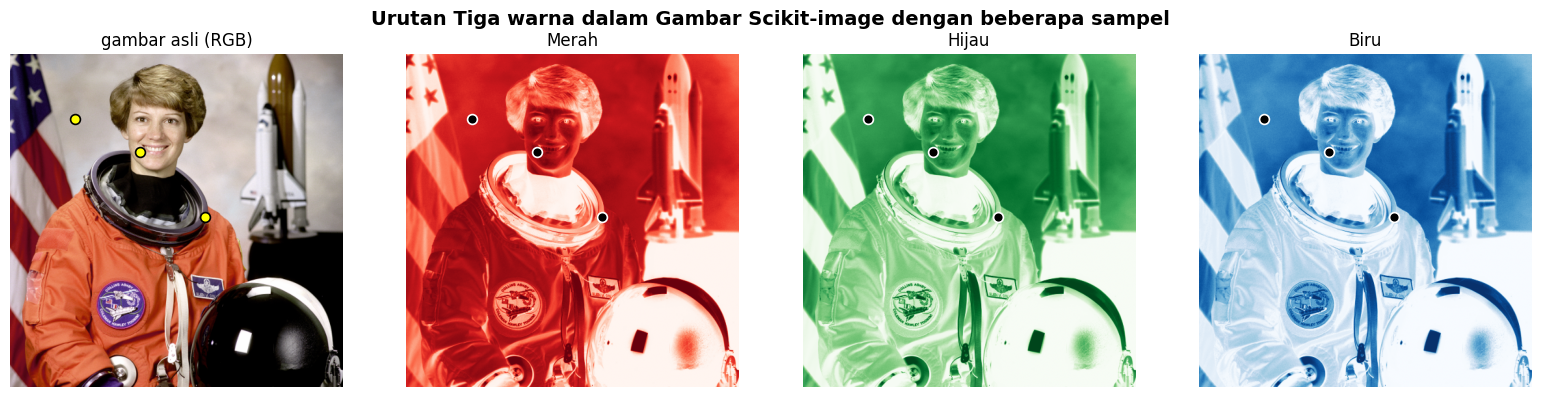

nilai RGB pada setiap titik: 
Titik 1 - koordinat (100, 100): 
Red     : 187
Green   : 176
Blue    : 169
RGB     : (187, 176,169)
Titik 2 - koordinat (200, 150): 
Red     : 236
Green   : 210
Blue    : 184
RGB     : (236, 210,184)
Titik 3 - koordinat (300, 250): 
Red     : 96
Green   : 76
Blue    : 93
RGB     : (96, 76,93)


In [9]:
#memeuat gambar
gambar_rgb = astronout_img

red_chanel = gambar_rgb[:, :, 0] #merah
green_chanel = gambar_rgb[:, :, 1] #hijau
blue_chanel = gambar_rgb[:, :, 2] #biru

titik_koordinat = [(100, 100), (200, 150), (300, 250)]

fig, axes = plt.subplots(1, 4, figsize=(16,4))

#gambar asli
axes[0].imshow(gambar_rgb)
axes[0].set_title("gambar asli (RGB)")
for x, y in titik_koordinat:
    axes[0].scatter(x, y, color='yellow', s=50, edgecolors='black', linewidth=1.2)
    
#gambar merah
axes[1].imshow(red_chanel, cmap='Reds')
axes[1].set_title("Merah")
for x, y in titik_koordinat:
    axes[1].scatter(x, y, color='black', s=50, edgecolors='white', linewidth=1.2)
    
    
#gambar hijau
axes[2].imshow(green_chanel, cmap='Greens')
axes[2].set_title("Hijau")
for x, y in titik_koordinat:
    axes[2].scatter(x, y, color='black', s=50, edgecolors='white', linewidth=1.2)
    
    
#gambar merah
axes[3].imshow(blue_chanel, cmap='Blues')
axes[3].set_title("Biru")
for x, y in titik_koordinat:
    axes[3].scatter(x, y, color='black', s=50, edgecolors='white', linewidth=1.2)
    
for ax in axes:
    ax.axis("off")
    
plt.suptitle("Urutan Tiga warna dalam Gambar Scikit-image dengan beberapa sampel", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

print("nilai RGB pada setiap titik: ")

for i, (x, y) in enumerate(titik_koordinat):
    r_val, g_val, b_val = gambar_rgb[y, x, 0], gambar_rgb[y, x, 1], gambar_rgb[y, x, 2]
    print(f"Titik {i+1} - koordinat ({x}, {y}): ")
    print(f"Red     : {r_val}")
    print(f"Green   : {g_val}")
    print(f"Blue    : {b_val}")
    print(f"RGB     : ({r_val}, {g_val},{b_val})")
    

## praktik 7 memahami format gambar BMP, JPEG, dan TIFF

C:\Users\DELL 7300\AppData\Local\Temp\ipykernel_18172\2105032461.py:7: FutureWarning: The plugin infrastructure in `skimage.io` is deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not pass additional keyword arguments for plugins (`**plugin_args`). Instead, use `imageio` or other I/O packages directly. See also `skimage.io.imsave`.
  io.imsave("astronout.jpg", sample_img, quality=95)


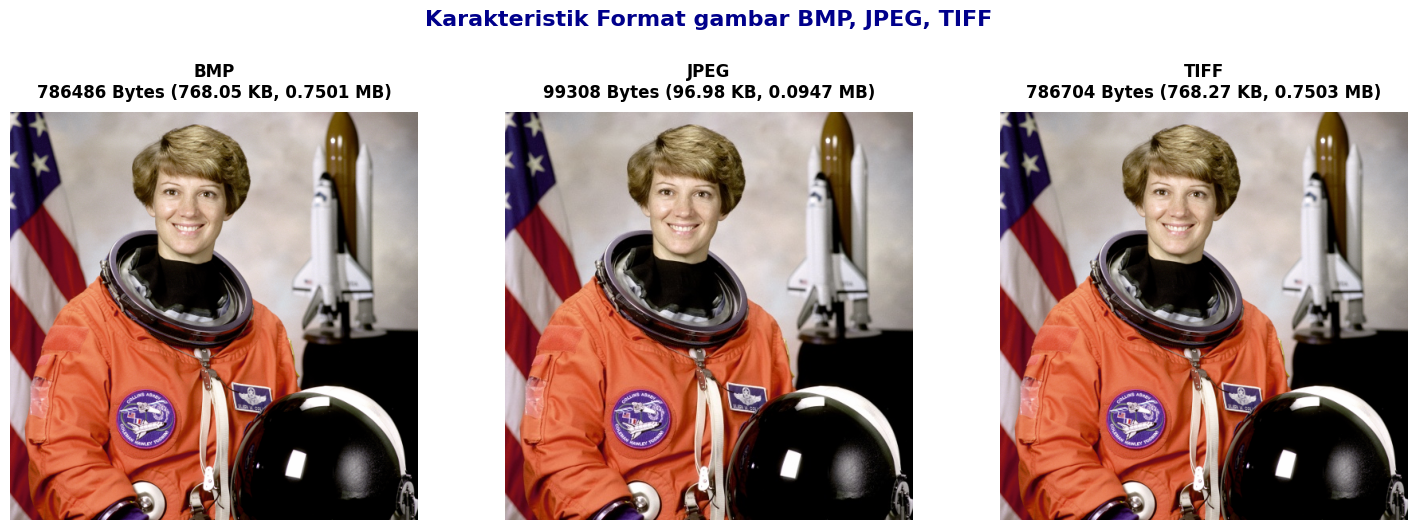

Karakteristik Format Citra:

1. BMP (Bitmap):
- Format tidak terkompresi, menghasilkan ukuran file yang besar.
- Kualitas gambar sangat baik, tidak ada kehilangan data.
- Cocok untuk pengolahan citra yang memerlukan ketelitian tinggi.
- Ukuran file: 786486 Bytes (768.05 KB, 0.7501 MB)

2. JPEG (Joint Photographic Experts Group):
- Format terkompresi dengan metode lossy (menghilangkan sebagian data).
- Ukuran file lebih kecil dibanding BMP dan TIFF.
- Cocok untuk fotografi, media sosial, dan tampilan web.
- Ukuran file: 99308 Bytes (96.98 KB, 0.0947 MB)

3. TIFF (Tagged Image File Format):
- Format fleksibel yang mendukung kompresi lossy atau lossless.
- Digunakan dalam pencetakan profesional dan pemrosesan citra medis.
- Ukuran file bisa besar tergantung tingkat kompresi yang digunakan.
- Ukuran file: 786704 Bytes (768.27 KB, 0.7503 MB)


In [10]:
from skimage import io
#import gambar
sample_img = astronout_img

#simpan dengan masing masing format
io.imsave("astronout.bmp", sample_img)
io.imsave("astronout.jpg", sample_img, quality=95)
io.imsave("astronout.tiff", sample_img)


import os

def size_file(nama):
    size_byte = os.path.getsize(nama)
    size_kb = size_byte / 1024
    size_mb = size_kb / 1024
    return f"{size_byte} Bytes ({size_kb:.2f} KB, {size_mb:.4f} MB)"

format_list = ["BMP", "JPEG", "TIFF"]
nama_file_list = ["astronout.bmp", "astronout.jpg", "astronout.tiff"]
ukuran = [size_file(file) for file in nama_file_list]

fig, axes = plt.subplots(1, 3, figsize=(15,5))
for ax, format, file in zip(axes,format_list, nama_file_list):
    img = io.imread(file)
    ax.imshow(img)
    ax.set_title(f"{format}\n{size_file(file)}", fontsize=12, fontweight="bold", color="black", pad=10)
    ax.axis("off")
    
plt.suptitle("Karakteristik Format gambar BMP, JPEG, TIFF", fontsize=16, fontweight="bold", color="darkblue", y=1.05)
plt.tight_layout()
plt.show()

# Menampilkan informasi karakteristik format citra
print("Karakteristik Format Citra:")

print("\n1. BMP (Bitmap):")
print("- Format tidak terkompresi, menghasilkan ukuran file yang besar.")
print("- Kualitas gambar sangat baik, tidak ada kehilangan data.")
print("- Cocok untuk pengolahan citra yang memerlukan ketelitian tinggi.")
print(f"- Ukuran file: {ukuran[0]}")

print("\n2. JPEG (Joint Photographic Experts Group):")
print("- Format terkompresi dengan metode lossy (menghilangkan sebagian data).")
print("- Ukuran file lebih kecil dibanding BMP dan TIFF.")

print("- Cocok untuk fotografi, media sosial, dan tampilan web.")
print(f"- Ukuran file: {ukuran[1]}")

print("\n3. TIFF (Tagged Image File Format):")
print("- Format fleksibel yang mendukung kompresi lossy atau lossless.")
print("- Digunakan dalam pencetakan profesional dan pemrosesan citra medis.")
print("- Ukuran file bisa besar tergantung tingkat kompresi yang digunakan.")
print(f"- Ukuran file: {ukuran[2]}")



## praktik 8 memahami kompresi loss dan lossless

C:\Users\DELL 7300\AppData\Local\Temp\ipykernel_18172\4243142247.py:6: FutureWarning: The plugin infrastructure in `skimage.io` is deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not pass additional keyword arguments for plugins (`**plugin_args`). Instead, use `imageio` or other I/O packages directly. See also `skimage.io.imsave`.
  io.imsave(jpg_quality50, sample_img, quality=50)
C:\Users\DELL 7300\AppData\Local\Temp\ipykernel_18172\4243142247.py:7: FutureWarning: The plugin infrastructure in `skimage.io` is deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not pass additional keyword arguments for plugins (`**plugin_args`). Instead, use `imageio` or other I/O packages directly. See also `skimage.io.imsave`.
  io.imsave(jpg_quality90, sample_img, quality=90)


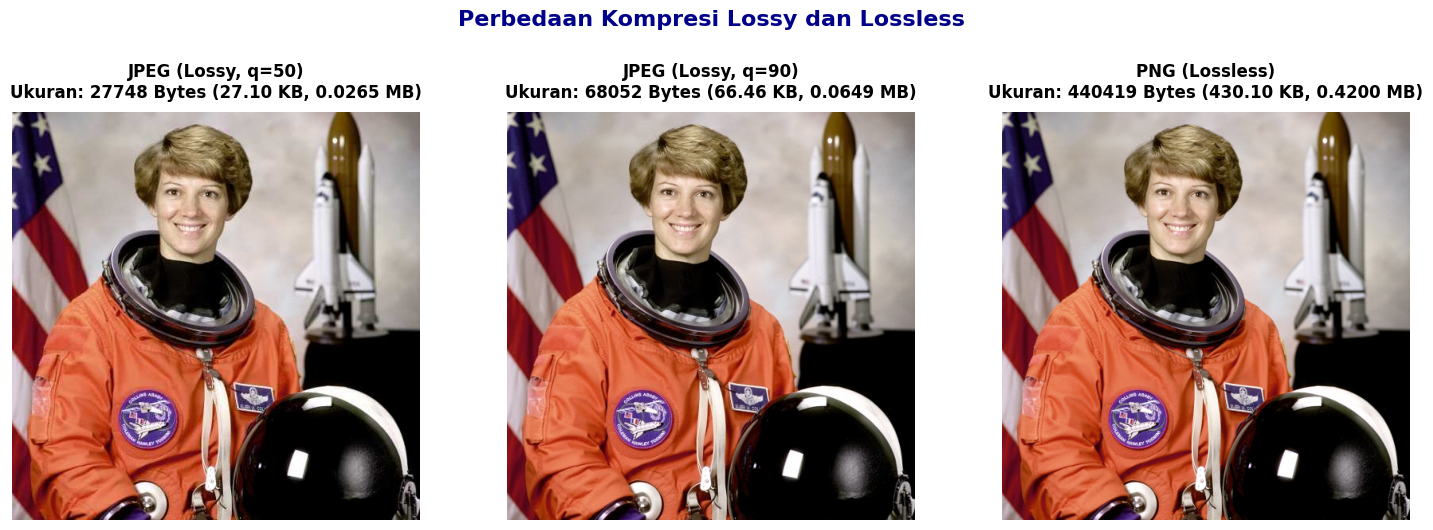

Perbedaan Kompresi Lossy dan Lossless:

1. JPEG (Lossy, Quality=50):
- Menggunakan kompresi lossy dengan kualitas rendah (Q=50).
- Detail gambar berkurang, muncul artefak kompresi.
- Ukuran file lebih kecil.
- Ukuran file: 27748 Bytes (27.10 KB, 0.0265 MB)

2. JPEG (Lossy, Quality=90):
- Menggunakan kompresi lossy dengan kualitas lebih tinggi (Q=90).
- Detail gambar masih cukup baik, artefak lebih sedikit.
- Ukuran file lebih besar dibanding Q=50, tetapi lebih kecil dibanding lossless.
- Ukuran file: 68052 Bytes (66.46 KB, 0.0649 MB)

3. PNG (Lossless):
- Menggunakan kompresi lossless, tidak ada kehilangan data.
- Detail gambar tetap sempurna seperti aslinya.
- Ukuran file lebih besar dibanding JPEG lossy.
- Ukuran file: 440419 Bytes (430.10 KB, 0.4200 MB)


In [11]:
#memuat gambar dalam format lossy dan lossless
jpg_quality50 = "astronout_lossy50.jpg"
jpg_quality90 = "astronout_lossy90.jpg"
png_lossless = "astronout_lossless.png"

io.imsave(jpg_quality50, sample_img, quality=50)
io.imsave(jpg_quality90, sample_img, quality=90)
io.imsave(png_lossless, sample_img)


nama_file_kompresi = [jpg_quality50, jpg_quality90, png_lossless]
ukuran_kompresi = [size_file(file) for file in nama_file_kompresi]

fig, axes = plt.subplots(1, 3, figsize=(15,5))
kompres_list = ["JPEG (Lossy, q=50)", "JPEG (Lossy, q=90)", "PNG (Lossless)"]

for ax, file, label in zip(axes, nama_file_kompresi, kompres_list):
    img = io.imread(file)
    ax.imshow(img)
    ax.set_title(f"{label}\nUkuran: {size_file(file)}", fontsize=12, fontweight="bold", color="black", pad=10)
    ax.axis("off")
    
plt.suptitle("Perbedaan Kompresi Lossy dan Lossless", fontsize=16, fontweight="bold", color="darkblue", y=1.05)
plt.tight_layout()
plt.show()

# Menampilkan informasi perbedaan kompresi dalam teks
print("Perbedaan Kompresi Lossy dan Lossless:")

print("\n1. JPEG (Lossy, Quality=50):")
print("- Menggunakan kompresi lossy dengan kualitas rendah (Q=50).")
print("- Detail gambar berkurang, muncul artefak kompresi.")
print("- Ukuran file lebih kecil.")
print(f"- Ukuran file: {ukuran_kompresi[0]}")

print("\n2. JPEG (Lossy, Quality=90):")
print("- Menggunakan kompresi lossy dengan kualitas lebih tinggi (Q=90).")
print("- Detail gambar masih cukup baik, artefak lebih sedikit.")
print("- Ukuran file lebih besar dibanding Q=50, tetapi lebih kecil dibanding lossless.")
print(f"- Ukuran file: {ukuran_kompresi[1]}")

print("\n3. PNG (Lossless):")
print("- Menggunakan kompresi lossless, tidak ada kehilangan data.")
print("- Detail gambar tetap sempurna seperti aslinya.")
print("- Ukuran file lebih besar dibanding JPEG lossy.")
print(f"- Ukuran file: {ukuran_kompresi[2]}")
